# Búsqueda de estructuras en “datos puntuales”

## Ejercicio

- Generar una distribución de puntos aleatoria en una caja de lado L.
- Calcular la funciónd de correlación y verificar que en el cubo generado, ésta es cero.
- Que el programe funcione en 2 y 3 dimensiones.
- Usar el código para calcular 2PCF en el conjunto de datos que nos proporcionará
- ¿Cómo haría más eficiente el cálculo?

### Inicialización

In [1]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import math
from IPython.display import clear_output

### Códigos de cálculos

#### Generar una distribución de puntos aleatorios en un cubo de lado L

In [2]:
def generateCubeRandom(L=1, seed= False, numeroPuntos=5, dimensiones=3):
    '''
    Descripción: Función que genera puntos aleatorios dentro de un cubo.
    IN = {
        L: El tamaño de los lados del cubo
        seed: Una seed para tener datos consistentes, si es False entonces es 100% random
        numeroPuntos: El número de puntos que queremos generar
    }
    OUT: Una lista de puntos aleatorios dentro del cubo de lado L
    '''
    if seed:
        np.random.seed(seed)
    if dimensiones==3:
        puntos=[[np.random.uniform(0, L),np.random.uniform(0, L),np.random.uniform(0, L)] for punto in range(numeroPuntos)]
    else:
        puntos=[[np.random.uniform(0, L),np.random.uniform(0, L),0] for punto in range(numeroPuntos)]
 
    return puntos

#### Función de correlación

In [76]:
def distanciasPuntos(datos, bins):
    '''
    Descripción: Calcula las distancias entre todos los puntos de un arreglo y los acomoda en un histograma.
    IN ={
            datos: Los datos a manejar. 
            bins: Una lista con los bins de nuestro histograma.
        }
    OUT: Una lista con la frecuencia de distancias que se encuentran en los rangos de bins.
    '''
    # Transformamos a numpy arreglos para mayor facilidad
    datos = np.array(datos)
    # Creamos un histograma vacío.
    histograma = np.histogram(np.zeros(shape=len(datos)),bins=bins)[0]
    # Recorremos punto por punto, sólo hay que recorrer esto una cantidad "datos" veces gracias a numpy
    for index in datos:
        aux = list(filter(lambda x: x != 0, np.sum(np.square(datos - index), axis = 1)**(1/2)))
        
        # Vamos creando nuestro histograma
        histograma += np.histogram(aux, bins=bins)[0]
    
    # Regresamos nuestro histograma, recordando que tenemos que dividir los valores entre dos porque se repiten.
    return histograma / 2

In [93]:
def funcionCorrelacion(datos, datosRandom, bins, L):
    '''
    Descripción: Calcula la función de correlación entre dos distribuciones
    IN = {
        NOTA: Los elementos deberán ser listas, no numpy arrays.
        datos: Lista de datos en 2 o 3 dimensiones.
        randomDistribution: Lista de puntos en la distribución aleatoria que queremos comparar.
        bins: Cuántas distancias queremos comparar.
        L: El tamaño de nuestro cubo aleatorio
    }
    OUT: Una lista, el primer item en la lista es apoyo para graficar y el segundo item es
    el valor de la función de correlación en los puntos bins.
    '''
    # Creamos el arreglo de puntos en conjunto.
    datosJuntos = datos + datosRandom
    # Calculamos el número de puntos que hay en los datos y en nuestra distribución aleatoria.
    numeroPuntosDatos = len(datos)
    numeroPuntosRandom = len(datosRandom)
    numeroPuntosJuntos = len(datosJuntos)
    # Calculamos el número de pares de datos que hay en los datos y en la distribución random, luego en un conjunto de ellos
    f = math.factorial
    numeroParesDatos = f(numeroPuntosDatos)/(2*f(numeroPuntosDatos - 2))
    numeroParesRandom = f(numeroPuntosRandom)/(2*f(numeroPuntosRandom - 2))
    numeroParesJuntos = f(numeroPuntosJuntos)/(2*f(numeroPuntosJuntos - 2))
    # Calculamos la separación que debe haber entre cada bin.
    separacionBins = [(Bin)*L/bins for Bin in range(bins+1)]
    
    # Ahora, calcularemos la distancia de cada uno de los puntos en datos, randomDistribution y en ambos en conjunto
    # Y las normalizamos
    DD = distanciasPuntos(datos, bins=separacionBins) / numeroParesDatos
    RR = distanciasPuntos(datosRandom, bins=separacionBins) / numeroParesRandom
    DR = distanciasPuntos(datosJuntos, bins=separacionBins) / numeroParesJuntos
    # Este es el valor de la función de correlación
    correlacion = (DD - 2*DR + RR)/RR
    # Creamos nuestras distancias, siendo estas las medias de cada intervalo en nuestros histogramas
    r = [(Bin+1)*(L/bins) + L/(2*bins) for Bin in range(bins)]
    
    return [r,correlacion]
    

### Códgios de visualización

#### Graficar el cubo

In [89]:
def graphCube(puntos, color="purple"):
    '''
    Descripción: Función que grafica puntos en 3D.
    IN = {
        coord: Una lista con coordenas [x,y,z], que a su vez, cada variable son una lista
        color: Inidica el color de nuestra gráfica
    }
    OUT: Gráfica 3d de los puntos
    '''
    # Transformaremos los puntos de manera más amigable para la función de abajo:
    x=[punto[0] for punto in puntos]
    y=[punto[1] for punto in puntos]
    z=[punto[2] for punto in puntos]

    # Ahora sí, esta parte grafica pero no sé exactamente qué hace xddd
    fig = plt.figure(figsize = (7,7)) # Define el tamaño de nuestra gráfica
    ax1 = fig.add_subplot(projection='3d') # Aparentemente le decimos que es el 3D
    ax1.scatter(x, y, z, "r", marker='.', color=color) # Pintamos cada punto en su respectiva posición

#### Graficar x,y normal

In [90]:
def graphFunction(x,y, color=["purple","blue"], labels=["x","y"], titulo="", scatter=False, corte=[0,-1]):
    '''
    Descripción: Función que grafica y con respecto a x
    IN = {
        x: Variable independiente.
        y: Variable dependiente.
        color: El color de la gráfica.
        labels: El nombre de las variables.
        titulo: El título
        scatter: Si es que se quieren resaltar los puntos
    }
    Out: Una bonita gráfica x-y
    '''
    # Creamos el objeto figura y nuestro ax.
    fig, ax = plt.subplots(figsize = (10, 7))
    # ponemos título
    ax.set_title(titulo)
    # Graficamos
    if scatter:
        ax.scatter(x[corte[0]:corte[1]],y[corte[0]:corte[1]], marker='.', c=color[0])
    ax.plot(x[corte[0]:corte[1]], y[corte[0]:corte[1]], color=color[1]) # Graficamos
    ax.set_xlabel(labels[0]) # Asignamos nombres a los labels
    ax.set_ylabel(labels[1]) # Asignamos nombres a los labels
    ax.grid() # Con cuadrícula

### Ejecutando el código

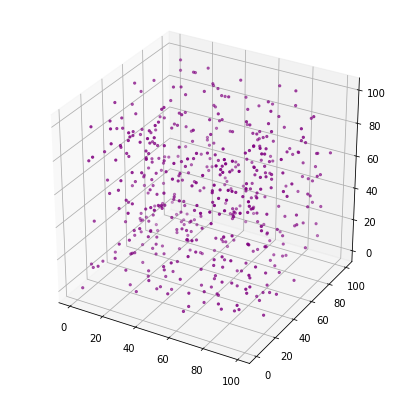

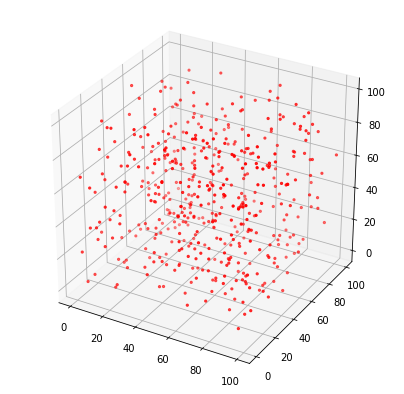

In [91]:
cube1=generateCubeRandom(L=100, numeroPuntos=500)
cube2=generateCubeRandom(L=100, numeroPuntos=500)
graphCube(puntos=cube1, color="purple")
graphCube(puntos=cube2, color="red")

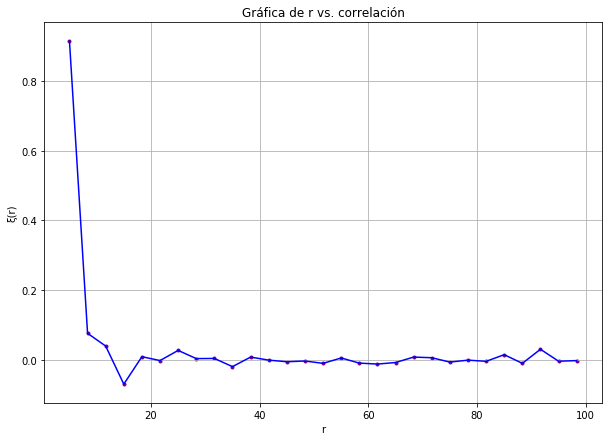

In [96]:
aux=funcionCorrelacion(datos=cube1, datosRandom=cube2, L=100, bins=30)
r = aux[0]
xi = aux[1]
graphFunction(x=r,y=xi, titulo="Gráfica de r vs. correlación", labels=["r", "ξ(r)"], scatter=True)

### Graficamos r^2*ξ(r)

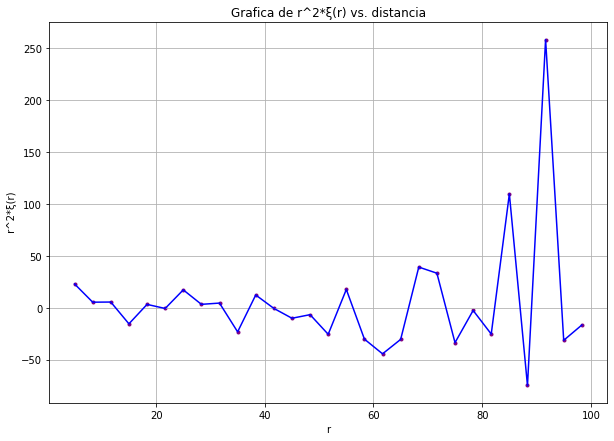

In [97]:
r2xi=np.array(r)**2 * np.array(xi)
graphFunction(x=r,y=r2xi,titulo="Grafica de r^2*ξ(r) vs. distancia", labels=["r"," r^2*ξ(r)"], scatter=True)

## Lo anterior fue un caso pequeño, ahora viene un caso bastante gordo

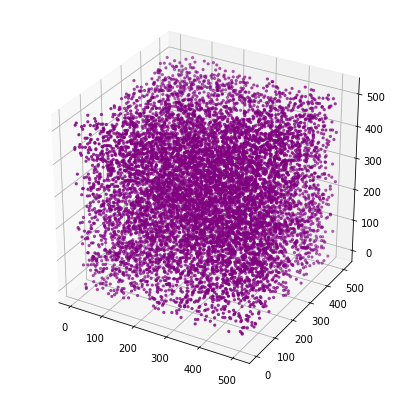

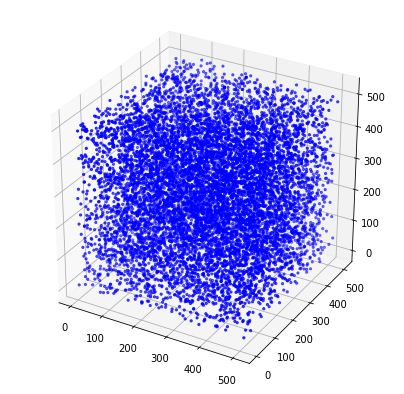

In [109]:
cuboGordo1 = generateCubeRandom(L=512, numeroPuntos=10000)
cuboGordo2 = generateCubeRandom(L=512, numeroPuntos=10000)
graphCube(cuboGordo1)
graphCube(cuboGordo2, color="blue")

In [110]:
auxGorda=funcionCorrelacion(datos=cuboGordo1, datosRandom=cuboGordo2, L=512, bins=30)
rGorda = auxGorda[0]
xiGorda = auxGorda[1]

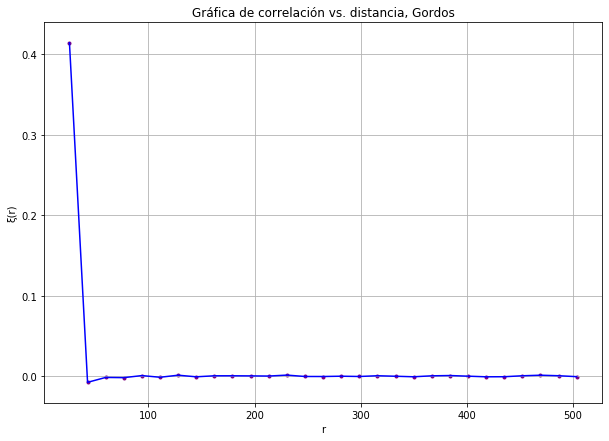

In [111]:
graphFunction(x=rGorda,y=xiGorda,titulo="Gráfica de correlación vs. distancia, Gordos", labels=["r","ξ(r)"], scatter=True)

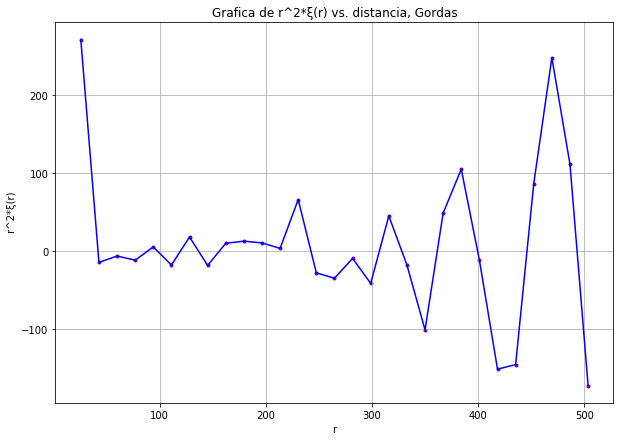

In [112]:
r2xiGordos=np.array(rGorda)**2 * np.array(xiGorda)
graphFunction(x=rGorda,y=r2xiGordos,titulo="Grafica de r^2*ξ(r) vs. distancia, Gordas", labels=["r"," r^2*ξ(r)"], scatter=True)